# Instalacja starszej wersji Tensorflow

In [ ]:
!pip install tensorflowjs
!pip install TensorFlow==2.15.0
!pip install tensorflow-decision-forests==1.8.1

# Import bibliotek

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Pobieranie danych
- Import danych
- Konwersja obrazów na float (z zakresu 0-255 na 0-1)
- Zmiana wektora wynikowego na kategorie (jeden z 10)
- Informacje o zbiorze treningowym (i testowym)
- Wydruk próbek ze zbioru treningowego

Rozmiar danych treningowych: (60000, 28, 28)
Rozmiar etykiet treningowych: (60000, 10)
Rozmiar danych testowych: (10000, 28, 28)
Rozmiar etykiet testowych: (10000, 10)


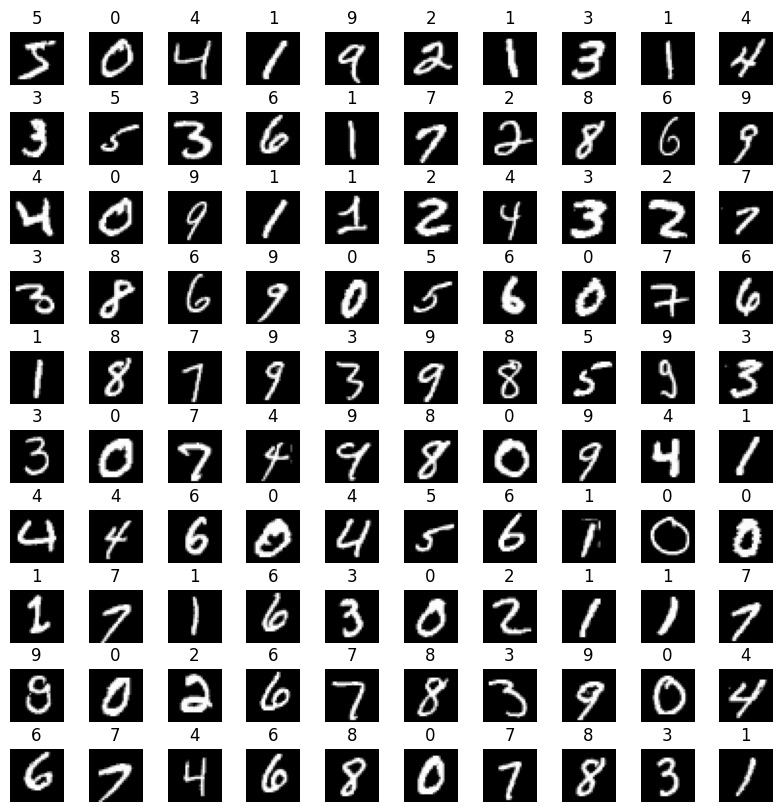

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("Rozmiar danych treningowych:", X_train.shape)
print("Rozmiar etykiet treningowych:", y_train.shape)
print("Rozmiar danych testowych:", X_test.shape)
print("Rozmiar etykiet testowych:", y_test.shape)

rows = 10
cols = 10

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
axes = axes.ravel()
for i in range(rows * cols):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f"{y_train[i].argmax()}")
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)
plt.show()



## Sposób wygenerowania wartości początkowych parametrów nwuronów (wag)

In [ ]:
constant_initializer = tf.keras.initializers.Constant(value=0.1)
random_initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
default_initializer = tf.keras.initializers.GlorotUniform()

kernel_initializer = random_initializer

In [ ]:
model = Sequential()

# Dodanie warstw konwolucyjnych i warstw max pooling
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = 5, strides = 1, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, strides = 1, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 256, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(units = 128, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(units = 84, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25600     
                                                                 
 batch_normalization (Batch  (None, 20, 20, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 20, 20, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 10, 32)        0

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, verbose=1,callbacks=early_stopping)
print("Test danych treningowych\n", model.predict(X_train))

Epoch 1/10
1875/1875 [==============================] - 190s 99ms/step - loss: 0.0349 - accuracy: 0.9441
Epoch 2/10
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0172 - accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 186s 99ms/step - loss: 0.0143 - accuracy: 0.9790
Epoch 4/10
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0120 - accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0106 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0099 - accuracy: 0.9856
Epoch 7/10
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0086 - accuracy: 0.9877
Epoch 8/10
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0079 - accuracy: 0.9883
Epoch 9/10
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0077 - accuracy: 0.9891
Epoch 10/10
1875/1875 [=========================

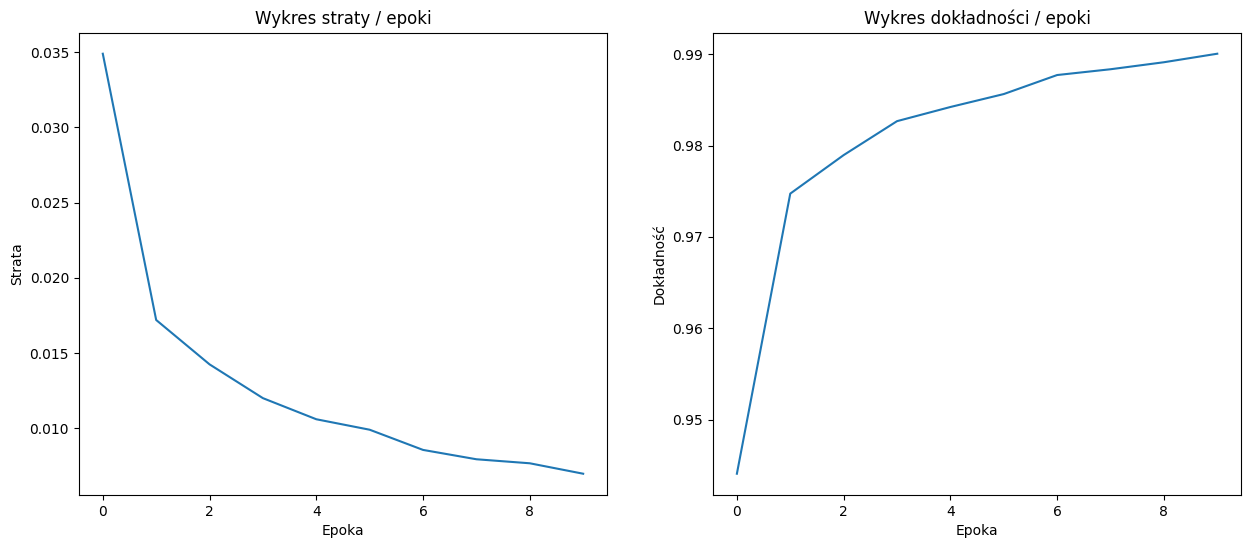

In [ ]:
# print('Ewaluacja modelu:', model.evaluate(X_train, y_train))
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(history.history['loss'])
axs[0].set_title('Wykres straty / epoki')
axs[0].set_xlabel('Epoka')
axs[0].set_ylabel('Strata')
# axs[0].set_ylim([0, 1])

axs[1].plot(history.history['accuracy'])
axs[1].set_title('Wykres dokładności / epoki')
axs[1].set_xlabel('Epoka')
axs[1].set_ylabel('Dokładność')
# axs[1].set_ylim([0, 1.2])

plt.show()

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'digits2')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
